Data set: https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:- https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF


Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year



Analyse the above linked dataset as like iris data.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import files

In [0]:
|uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['deliveries.csv'].decode('utf-8')))
df.head()

Saving deliveries.csv to deliveries.csv


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [0]:

uploaded = files.upload()
df1 = pd.read_csv(io.StringIO(uploaded['haberman.csv'].decode('utf-8')))
df1.head()

Saving haberman.csv to haberman.csv


,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)


In [0]:
#Write your code here for ploting--

In [0]:
df1['survive'].value_counts()

1    225
2     81
Name: survive, dtype: int64

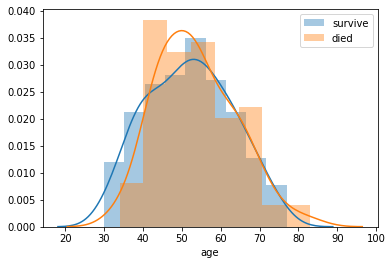

In [0]:
sns.distplot(df1[df1['survive']==1]['age'])
sns.distplot(df1[df1['survive']==2]['age'])
plt.legend(labels=['survive','died'])
plt.show()

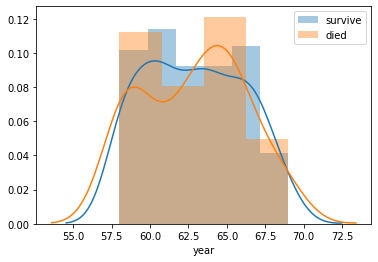

In [0]:
sns.distplot(df1[df1['survive']==1]['year'])
sns.distplot(df1[df1['survive']==2]['year'])
plt.legend(labels=['survive','died'])
plt.show()

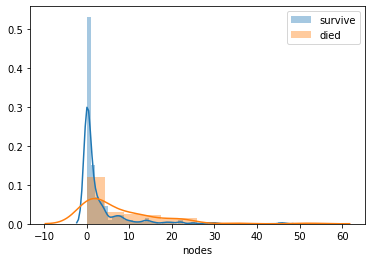

In [0]:
sns.distplot(df1[df1['survive']==1]['nodes'])
sns.distplot(df1[df1['survive']==2]['nodes'])
plt.legend(labels=['survive','died'])
plt.show()

In [0]:
# Write your comments here--

'nodes' is the best feature for 'survive' estimation as from 0 to 2(approximatly) suvive rate has higher density and from 2 to 25 we have died rate in higher density than survive rate. so we can say after crossing point 5 it's going to indicate died.  

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches


In [0]:
def player_runs(a,b):
  new_df = df[df['batsman']==a]
  new_df = (new_df.groupby('match_id').sum()['batsman_runs']).reset_index()
  print("Runs Scored by the batsman after",b,'matches is', new_df[:b].sum()['batsman_runs'])

In [0]:
player_runs('S Dhawan',5)

Runs Scored by the batsman after 5 matches is 135


In [0]:
player_runs('RG Sharma',15)


Runs Scored by the batsman after 15 matches is 309


Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF

In [0]:
def pdf_calcu(a,b):
  new_df1 = df[df['batsman']==a]
  new_df1 = (new_df1.groupby('match_id').sum()['batsman_runs']).reset_index()
  new_df2 = df[df['batsman']==b]
  new_df2 = (new_df2.groupby('match_id').sum()['batsman_runs']).reset_index()
  sns.distplot(new_df1['batsman_runs'])
  sns.distplot(new_df2['batsman_runs'])
  plt.legend(labels=[a,b])
  plt.show()


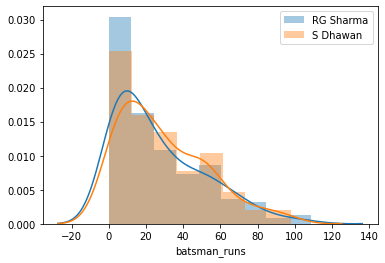

In [0]:
pdf_calcu('RG Sharma','S Dhawan')

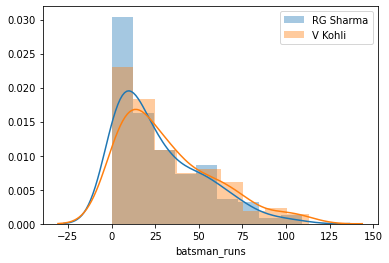

In [0]:
pdf_calcu('RG Sharma','V Kohli')

Q4-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

 (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [0]:
def pdfcdf_func(a):
  c,b = np.histogram(a,bins = 10)
  pdf = c/sum(c)
  cdf = np.cumsum(pdf)
  plt.plot(b[1:],pdf)
  plt.plot(b[1:],cdf)
  

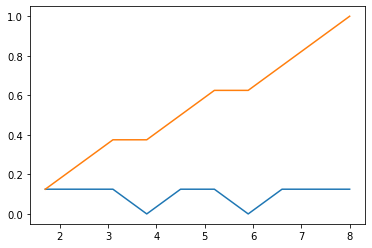

In [6]:
pdfcdf_func([1,2,3,4,5,6,7,8])